The purpose is to test out the analysis / visualization while waiting for scrape / clean to complete.

Using a file that contains manually downloaded abstracts.  All abstracts in one file, in the `'摘要'` column.

Algorithm currently has problems
- using average vector of all words, not a good metric
- Tsne seems unstable, large changes with random_state


In [7]:
fileName = './Patents/excel2017-06-27-12-04-58.xlsx'

In [8]:
import pandas as pd
import spacy
import numpy as np

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load('en')

In [9]:
dfFull = pd.read_excel(fileName, skiprows=1)

In [58]:
df = dfFull[['申请号','公开号','摘要']]

In [59]:
abstracts = df.摘要.values



In [60]:

# nlp will process a document, of any size
docs = []
for text in abstracts:
    docs.append( nlp(text))

In [61]:
cross_similarity_matrix = []

for doc1 in docs:
    cross_similarity_vector = []
    for doc2 in docs:
        cross_similarity_vector.append(doc1.similarity(doc2))
    cross_similarity_matrix.append(cross_similarity_vector)



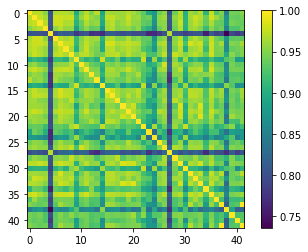

In [62]:
import matplotlib.pyplot as plt
plt.imshow(cross_similarity_matrix, aspect=1)
plt.colorbar()
plt.show()

In [63]:
from sklearn.manifold import TSNE


# seems very sensitive to random_state , algorith unstable at this time
model = TSNE(n_components=3, random_state=42)
np.set_printoptions(suppress=True)

# doc.vector returns average vector of all tokens, not a good metric, but should work for first try
X = []
for doc in docs:
    X.append(doc.vector)
mapped = model.fit_transform( X ) 

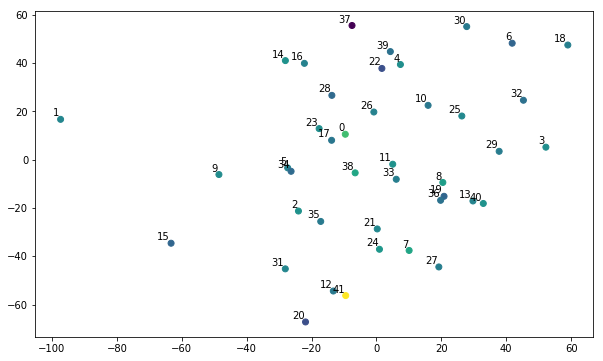

In [64]:
plt.figure(figsize=(10,6))
plt.scatter(mapped[:,0],mapped[:,1], c = mapped[:,2])

for label, x, y in zip(df.index, mapped[:,0],mapped[:,1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-1, 1),
        textcoords='offset points', ha='right', va='bottom',
      #  bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      #  arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
        )



plt.show()